In [1]:
!pip install easyocr
!pip install imutils

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


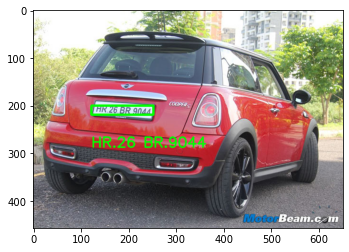

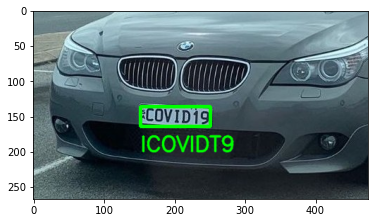

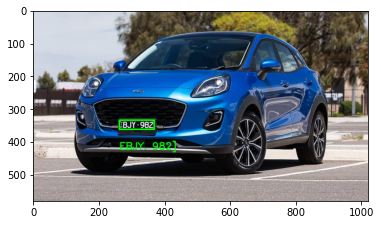

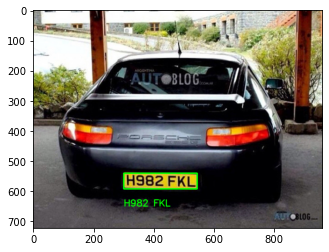

In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

image_length = 4

#Go through all images in document
for i in range(image_length):
    
    #Read Image
    img = cv2.imread('image'+str(i+1)+'.jpg')

    #Color Image Gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Reduce Noise
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

    #Detect Edges
    edged = cv2.Canny(bfilter, 30, 200)

    #Find Contours, approximate the lines and return data in a tree format
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #Simplifies the contours
    contours = imutils.grab_contours(keypoints)

    #Returns the top 10 contours sorting by area
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    #Loop through our sorted contours
    for contour in contours:
        #Approximate Contour Polygons
        approx = cv2.approxPolyDP(contour, 10, True)
        #If approximation has 4 key points (square)
        if (len(approx) == 4):
            location = approx
            break

    #Fill Everything but the license plate with black pixels
    mask = np.zeros(gray.shape, np.uint8)

    #Draw the License Plate Contour ONLY
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)

    #Overlay the mask on our image
    new_image = cv2.bitwise_and(img, img, mask = mask)

    #Store coordinates of non black pixels
    (x,y) = np.where(mask==255)

    #Get the Min and Max to get the license outline
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))

    #Crop the image to only include the license plate
    cropped_image = gray[x1:x2+1, y1:y2+1]

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    #Get the Plate Number from the results array
    text = result[0][-2]

    #Choose the Font
    font = cv2.FONT_HERSHEY_SIMPLEX

    #Apply onto image
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    
    #Output the image
    plt.figure()
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


    

  
